# Pattern Recognition

# Lucas Nogueira Ribeiro

## First exercise

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [37]:
x_train = np.loadtxt('05_Assignment_data/data_A_learning_input.txt')
t_train = np.loadtxt('05_Assignment_data/data_A_learning_output.txt')

x_test = np.loadtxt('05_Assignment_data/data_A_testing_input.txt')
t_test = np.loadtxt('05_Assignment_data/data_A_testing_output.txt')

x_train.shape = (2000,1)
t_train.shape = (2000,1)

x_test.shape = (1000, 1)
t_test.shape = (1000, 1)

# standardize data
x_train = (x_train - x_train.mean())/x_train.std()
t_train = (t_train - t_train.mean())/t_train.std()
x_test = (x_test - x_test.mean())/x_test.std()
t_test = (t_test - t_test.mean())/t_test.std()

In [38]:
K = x_test.shape[0]
N = x_train.shape[0]
y = np.zeros((K,))

for k in np.arange(K):
    x = x_test[k]

    # calculate kernels
    kernel = np.zeros((N,))
    for n in np.arange(N):
        kernel[n] = np.exp(-0.5*np.linalg.norm(x-x_train[n])**2)

    # normalize
    #nkernel = kernel/kernel.sum()

    # predict
    y[k] = np.dot(kernel, t_train)/kernel.sum()

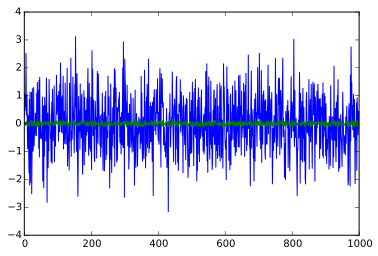

In [39]:
plt.figure()
plt.plot(t_test)
plt.plot(y)

## Second exercise

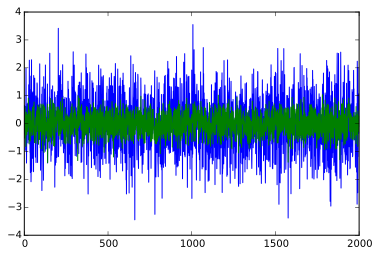

In [40]:
# simulation parameters
N = x_train.shape[0]    # sample size
M = 100                 # number of radial basis functions
lamb = 0.0             # reg factor

# calculate cluster centers
kmeans = cluster.KMeans(n_clusters=M)
kmeans.fit(x_train, t_train)
centers = kmeans.cluster_centers_

# compute design matrix
Phi = np.zeros((N, M))
for m in np.arange(M):
    for n in np.arange(N):
        Phi[n,m] = np.exp(-0.5*np.linalg.norm(x_train[n]-centers[m]))       

# regularized least-squares
w = np.dot(np.linalg.inv(lamb*np.eye(M) + np.dot(Phi.T, Phi)), \
           np.dot(Phi.T, t_train))

# predict
y = np.dot(Phi, w)

# plot results
plt.figure()
plt.plot(t_train)
plt.plot(y)

## Third exercise

In [46]:
x_train = np.loadtxt('05_Assignment_data/data_B_learning_input.txt')
t_train = np.loadtxt('05_Assignment_data/data_B_learning_output.txt')

x_test = np.loadtxt('05_Assignment_data/data_B_testing_input.txt')
t_test = np.loadtxt('05_Assignment_data/data_B_testing_output.txt')

print x_train.shape, t_train.shape
print x_test.shape, t_test.shape

(3000,) (3000,)
(1000,) (1000,)


In [43]:
def kernel(xn, xm, theta0, theta1):
    return theta0*np.exp(-theta1*(np.linalg.norm(xn-xm)**2)/2.0)

In [72]:
N = x_train.shape[0]
#J = x_test.shape[0]
J = 3
std = 2
var = std**2
beta = 1./var
theta1 = 1.
theta0 = 1.

pred = np.zeros((J,1))

for j in np.arange(J):
    print 'sample {}/{}'.format(j,J)

    # Calculate CN
    CN = np.zeros((N,N))

    for n in np.arange(N):
        for m in np.arange(M):
            CN[n,m] = kernel(x_train[n], x_train[m], theta0, theta1)

    CN += (1./beta)*np.eye(N)   

    # Compute k
    xnew = x_test[0]
    k = np.zeros((N,1))
    for n in np.arange(N):
        k[n] = kernel(x_train[n], xnew, theta0, theta1)

    # Compute c
    c = kernel(xnew, xnew, theta0, theta1) + 1./beta

    # predict
    pred[j] = np.dot(k.T, np.dot(np.linalg.inv(CN), t_train))

sample 0/3
sample 1/3
sample 2/3


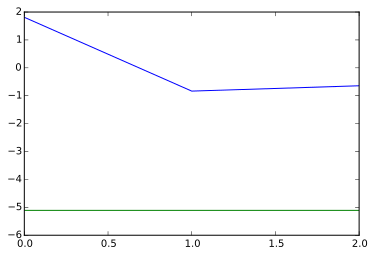

In [73]:
plt.figure()
plt.plot(t_test[:J])
plt.plot(pred)